<a href="https://colab.research.google.com/github/carlosgilrodrigo/TFM/blob/main/Clustering60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importación de paquetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lectura de datos
df = pd.read_csv('/content/drive/MyDrive/TFM/datasetLimpio60.csv', decimal='.')

In [4]:
df

,home_team,away_team,result_full,result_ht,home_passes,home_possession,home_shots,home_shots_on_target,home_touches,away_passes,...,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,result_match,result_descanso,num_season
0,blackpool,west bromwich albion,2-1,1-0,0.45,0.73,0.59,0.29,0.49,0.14,...,0.21,0.46,0.42,0.00,0.25,0.40,0.33,0,0,1
1,liverpool,manchester city,3-0,3-0,0.42,0.54,0.48,0.29,0.50,0.37,...,0.24,0.18,0.61,0.27,0.07,0.74,0.49,0,0,1
2,manchester united,arsenal,1-0,1-0,0.30,0.43,0.39,0.35,0.36,0.41,...,0.31,0.17,0.62,0.29,0.06,0.66,0.71,0,0,1
3,stoke city,aston villa,2-1,0-1,0.12,0.39,0.48,0.53,0.19,0.26,...,0.00,1.00,0.42,0.00,0.75,0.43,0.00,0,2,1
4,fulham,chelsea,0-0,0-0,0.19,0.30,0.30,0.29,0.29,0.51,...,0.28,0.18,0.64,0.23,0.19,0.49,0.46,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,liverpool,brighton and hove albion,0-1,0-0,0.62,0.70,0.25,0.06,0.67,0.29,...,0.20,0.23,0.48,0.20,0.20,0.46,0.40,2,1,11
4066,burnley,leicester city,1-1,1-1,0.21,0.32,0.27,0.41,0.23,0.50,...,0.32,0.14,0.73,0.23,0.10,0.63,0.77,1,1,11
4067,crystal palace,manchester united,0-0,0-0,0.21,0.29,0.18,0.12,0.25,0.53,...,0.32,0.17,0.70,0.23,0.19,0.49,0.74,1,1,11
4068,sheffield united,aston villa,1-0,1-0,0.10,0.16,0.20,0.12,0.13,0.58,...,0.23,0.13,0.64,0.21,0.06,0.66,0.59,0,0,11


# 1 - Rendimiento del equipo local

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecciona las características relevantes para el rendimiento del equipo local
features_local = [
    'home_passes', 'away_passes',
    'home_possession', 'away_possession',
    'home_shots', 'away_shots',
    'goal_home_ft', 'goal_away_ft'
]

# Selecciona las etiquetas de los resultados de los partidos (0, 1, 2)
result_labels = df['result_match']

# Selecciona las características y etiquetas para el clustering
features_for_clustering_local = df[features_local]
features_and_labels_local = pd.concat([features_for_clustering_local, result_labels], axis=1)

# Normalización/estandarización de características
scaler_local = StandardScaler()
features_scaled_local = scaler_local.fit_transform(features_for_clustering_local)

# K-Means clustering para el rendimiento del equipo local
kmeans_local = KMeans(n_clusters=3, random_state=42)
df['cluster_result_local'] = kmeans_local.fit_predict(features_scaled_local)

# Verifica la distribución de los clusters en función de los resultados de los partidos
result_distribution_local = df.groupby(['cluster_result_local', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_local)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


result_match            0    1    2
cluster_result_local               
0                     689  257  195
1                     808  488  528
2                     338  255  512


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-868b0217f4b0>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victorias_locales['cluster_result_local'] = kmeans_local.fit_predict(features_scaled_local)
<ipython-input-6-868b0217f4b0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_victorias_locales['

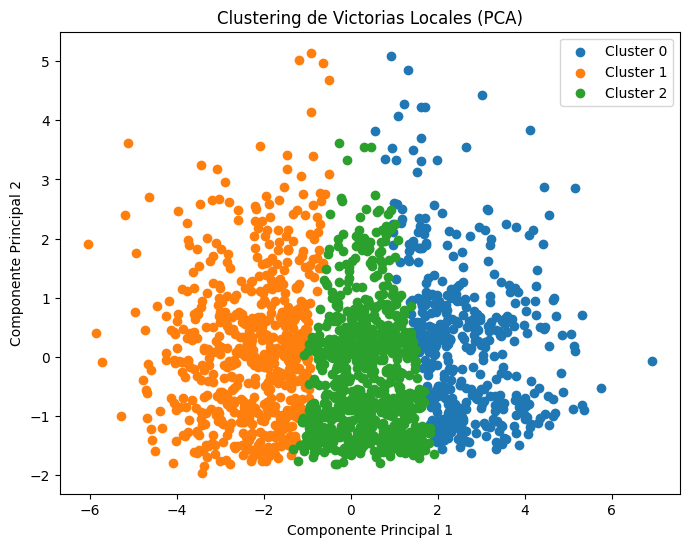

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecciona las características relevantes para el rendimiento del equipo local
features_local = [
    'home_passes', 'away_passes',
    'home_possession', 'away_possession',
    'home_shots', 'away_shots',
    'goal_home_ft', 'goal_away_ft'
]

# Filtra el DataFrame para considerar solo las victorias locales
df_victorias_locales = df[df['result_match'] == 0]

# Selecciona las características y etiquetas para el clustering
features_for_clustering_local = df_victorias_locales[features_local]

# Normalización/estandarización de características
scaler_local = StandardScaler()
features_scaled_local = scaler_local.fit_transform(features_for_clustering_local)

# Aplica PCA para reducir a 2 componentes principales
pca_local = PCA(n_components=2)
features_pca_local = pca_local.fit_transform(features_scaled_local)

# K-Means clustering para el rendimiento del equipo local
kmeans_local = KMeans(n_clusters=3, random_state=42)
df_victorias_locales['cluster_result_local'] = kmeans_local.fit_predict(features_scaled_local)

# Añade las componentes principales al DataFrame
df_victorias_locales['PCA_Component_1'] = features_pca_local[:, 0]
df_victorias_locales['PCA_Component_2'] = features_pca_local[:, 1]

# Grafica de dispersión con colores según el cluster
plt.figure(figsize=(8, 6))

for cluster in range(3):
    cluster_data = df_victorias_locales[df_victorias_locales['cluster_result_local'] == cluster]
    plt.scatter(cluster_data['PCA_Component_1'], cluster_data['PCA_Component_2'], label=f'Cluster {cluster}')

plt.title('Clustering de Victorias Locales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# 2 - Rendimiento del equipo visitante

In [7]:
# Selecciona las características relevantes para el rendimiento del equipo away
features_away = [
    'away_passes',
    'away_possession',
    'away_shots',
    'away_shots_on_target',
    'goal_away_ft',
    'sg_match_ft'
]

# Selecciona las etiquetas de los resultados de los partidos (0, 1, 2)
result_labels = df['result_match']

# Selecciona las características y etiquetas para el clustering
features_for_clustering_away = df[features_away]
features_and_labels_away = pd.concat([features_for_clustering_away, result_labels], axis=1)

# Normalización/estandarización de características
scaler_away = StandardScaler()
features_scaled_away = scaler_away.fit_transform(features_for_clustering_away)

# K-Means clustering para el rendimiento del equipo away
kmeans_away = KMeans(n_clusters=3, random_state=42)
df['cluster_result_away'] = kmeans_away.fit_predict(features_scaled_away)

# Verifica la distribución de los clusters en función de los resultados de los partidos
result_distribution_away = df.groupby(['cluster_result_away', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_away)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


result_match           0    1    2
cluster_result_away               
0                    842  363  122
1                     62  153  807
2                    931  484  306


# 3 - Estadísticas acumuladas del equipo local como anfitrión

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


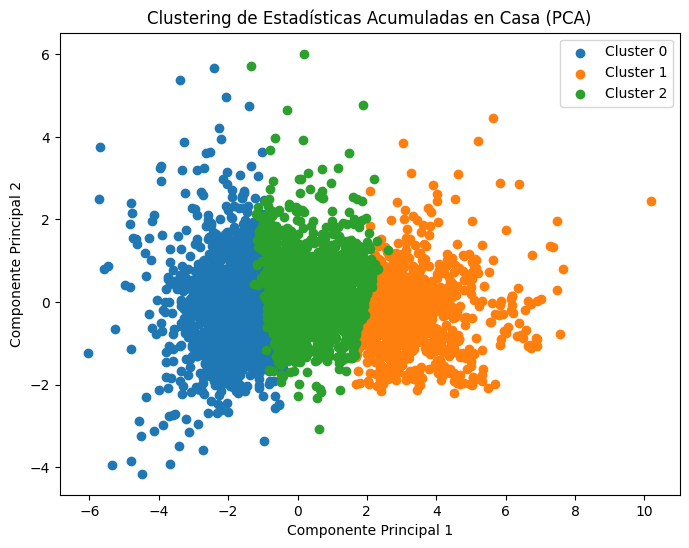

result_match                0    1    2
cluster_home_accumulated               
0                         568  440  632
1                         551  141  100
2                         716  419  503


In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecciona las características relevantes para las estadísticas acumuladas en casa
features_home_accumulated = [
    'corners_avg_H', 'passes_avg_H',
    'possession_avg_H', 'shots_avg_H',
    'shots_on_target_avg_H', 'goals_scored_ft_avg_H',
    'goals_conced_ft_avg_H', 'sg_match_ft_acum_H'
]

# Selecciona las características para el clustering
features_for_clustering_home = df[features_home_accumulated]

# Normalización/estandarización de características
scaler_home = StandardScaler()
features_scaled_home = scaler_home.fit_transform(features_for_clustering_home)

# Aplica PCA para reducir a 2 componentes principales
pca_home = PCA(n_components=2)
features_pca_home = pca_home.fit_transform(features_scaled_home)

# K-Means clustering para las estadísticas acumuladas en casa del equipo local
kmeans_home = KMeans(n_clusters=3, random_state=42)
df['cluster_home_accumulated'] = kmeans_home.fit_predict(features_scaled_home)

# Añade las componentes principales al DataFrame
df['PCA_Component_Home_1'] = features_pca_home[:, 0]
df['PCA_Component_Home_2'] = features_pca_home[:, 1]

# Grafica de dispersión con colores según el cluster
plt.figure(figsize=(8, 6))

for cluster in range(3):
    cluster_data = df[df['cluster_home_accumulated'] == cluster]
    plt.scatter(cluster_data['PCA_Component_Home_1'], cluster_data['PCA_Component_Home_2'], label=f'Cluster {cluster}')

plt.title('Clustering de Estadísticas Acumuladas en Casa (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

result_distribution_home = df.groupby(['cluster_home_accumulated', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_home)

# 4 - Estadísticas acumuladas del equipo visitante como anfitrión

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


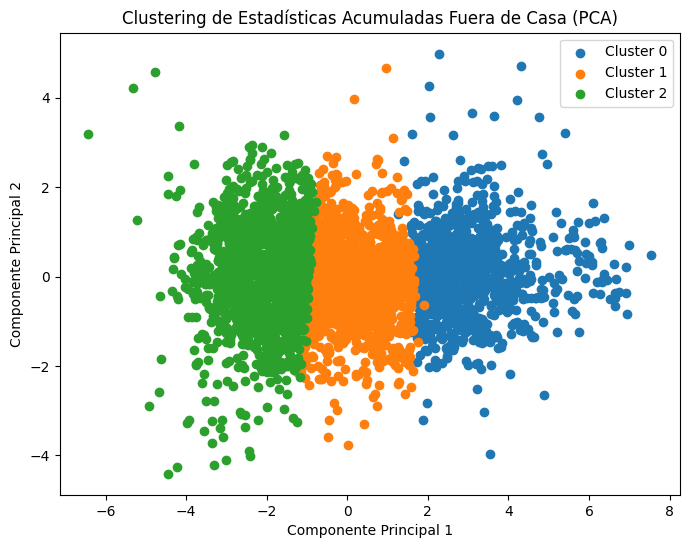

result_match                0    1    2
cluster_away_accumulated               
0                         283  222  450
1                         719  415  486
2                         833  363  299


In [9]:
# Selecciona las características relevantes para las estadísticas acumuladas fuera de casa
features_away_accumulated = [
    'corners_avg_A', 'passes_avg_A',
    'possession_avg_A', 'shots_avg_A',
    'shots_on_target_avg_A', 'goals_scored_ft_avg_A',
    'goals_conced_ft_avg_A', 'sg_match_ft_acum_A'
]

# Selecciona las características para el clustering
features_for_clustering_away = df[features_away_accumulated]

# Normalización/estandarización de características
scaler_away = StandardScaler()
features_scaled_away = scaler_away.fit_transform(features_for_clustering_away)

# Aplica PCA para reducir a 2 componentes principales
pca_away = PCA(n_components=2)
features_pca_away = pca_away.fit_transform(features_scaled_away)

# K-Means clustering para las estadísticas acumuladas fuera de casa del equipo visitante
kmeans_away = KMeans(n_clusters=3, random_state=42)
df['cluster_away_accumulated'] = kmeans_away.fit_predict(features_scaled_away)

# Añade las componentes principales al DataFrame
df['PCA_Component_Away_1'] = features_pca_away[:, 0]
df['PCA_Component_Away_2'] = features_pca_away[:, 1]

# Grafica de dispersión con colores según el cluster
plt.figure(figsize=(8, 6))

for cluster in range(3):
    cluster_data = df[df['cluster_away_accumulated'] == cluster]
    plt.scatter(cluster_data['PCA_Component_Away_1'], cluster_data['PCA_Component_Away_2'], label=f'Cluster {cluster}')

plt.title('Clustering de Estadísticas Acumuladas Fuera de Casa (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

result_distribution_away = df.groupby(['cluster_away_accumulated', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_away)

# 5 - Rendimiento en primeras mitades de equipos locales

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecciona las características relevantes para el rendimiento en la primera mitad del equipo local
features_half_time = [
    'goal_home_ht', 'shots_avg_H', 'shots_on_target_avg_H',
    'home_passes', 'home_possession', 'home_touches'
]

# Selecciona las características para el clustering
features_for_clustering_half_time = df[features_half_time]

# Normalización/estandarización de características
scaler_half_time = StandardScaler()
features_scaled_half_time = scaler_half_time.fit_transform(features_for_clustering_half_time)

# K-Means clustering para el rendimiento en la primera mitad del equipo local
kmeans_half_time = KMeans(n_clusters=3, random_state=42)
df['cluster_half_time_performance'] = kmeans_half_time.fit_predict(features_scaled_half_time)

# Verifica la distribución de los clusters en función de los resultados de los partidos
result_distribution_half_time = df.groupby(['cluster_half_time_performance', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_half_time)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


result_match                     0    1    2
cluster_half_time_performance               
0                              479  418  552
1                              661  397  543
2                              695  185  140


# 6 - Rendimiento en primeras mitades de equipos visitantes

In [11]:
# Selecciona las características relevantes para el rendimiento en la primera mitad del equipo visitante
features_half_time_away = [
    'goal_away_ht', 'shots_avg_A', 'shots_on_target_avg_A',
    'away_passes', 'away_possession', 'away_touches'
]

# Selecciona las características para el clustering del equipo visitante
features_for_clustering_half_time_away = df[features_half_time_away]

# Normalización/estandarización de características para el equipo visitante
scaler_half_time_away = StandardScaler()
features_scaled_half_time_away = scaler_half_time_away.fit_transform(features_for_clustering_half_time_away)

# K-Means clustering para el rendimiento en la primera mitad del equipo visitante
kmeans_half_time_away = KMeans(n_clusters=3, random_state=42)
df['cluster_half_time_performance_away'] = kmeans_half_time_away.fit_predict(features_scaled_half_time_away)

# Verifica la distribución de los clusters en función de los resultados de los partidos para el equipo visitante
result_distribution_half_time_away = df.groupby(['cluster_half_time_performance_away', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_half_time_away)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


result_match                          0    1    2
cluster_half_time_performance_away               
0                                   749  398  386
1                                   291  225  493
2                                   795  377  356


# 7 - Posesion, toques y pases del equipo local y visitante

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_passes_possession_touches
0    1843
1    1139
2    1088
dtype: int64


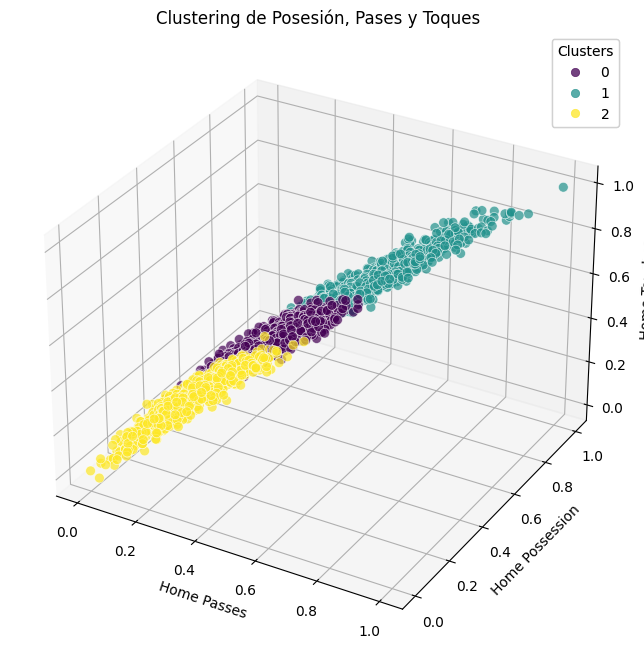

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecciona las características relevantes para el clustering
features_passes_possession_touches = [
    'home_passes', 'home_possession', 'home_touches',
    'away_passes', 'away_possession', 'away_touches'
]

# Selecciona las características para el clustering
features_for_clustering_passes_possession_touches = df[features_passes_possession_touches]

# Normalización/estandarización de características
scaler_passes_possession_touches = StandardScaler()
features_scaled_passes_possession_touches = scaler_passes_possession_touches.fit_transform(features_for_clustering_passes_possession_touches)

# K-Means clustering para las características de posesión, pases y toques
kmeans_passes_possession_touches = KMeans(n_clusters=3, random_state=42)
df['cluster_passes_possession_touches'] = kmeans_passes_possession_touches.fit_predict(features_scaled_passes_possession_touches)

# Verifica la distribución de los clusters
result_distribution_passes_possession_touches = df.groupby('cluster_passes_possession_touches').size()
print(result_distribution_passes_possession_touches)

from mpl_toolkits.mplot3d import Axes3D

# Graficar la distribución de clusters en función de las características
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores para cada cluster
colors = df['cluster_passes_possession_touches']

# Gráfico de dispersión tridimensional
scatter = ax.scatter(
    df['home_passes'], df['home_possession'], df['home_touches'],
    c=colors, cmap='viridis', s=50, alpha=0.7, edgecolors='w', linewidth=0.5
)

ax.set_xlabel('Home Passes')
ax.set_ylabel('Home Possession')
ax.set_zlabel('Home Touches')

# Añadir leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.title('Clustering de Posesión, Pases y Toques')
plt.show()



# 8 - Tiros a puerta de equipos locales y visitantes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_shots_on_target
0    1126
1    1784
2    1160
dtype: int64


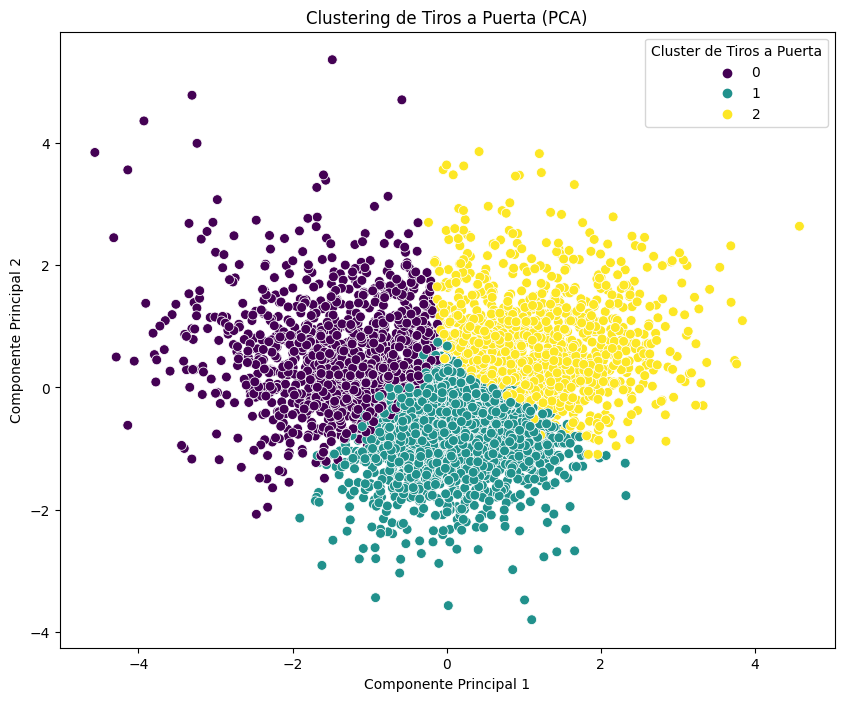

result_match               0    1    2
cluster_shots_on_target               
0                        829  204   93
1                        760  536  488
2                        246  260  654


In [19]:
from sklearn.decomposition import PCA

# Selecciona las características relevantes para el clustering de tiros a puerta
features_shots_on_target = ['home_shots_on_target', 'away_shots_on_target', 'shots_on_target_avg_H', 'shots_on_target_avg_A']

# Selecciona las características para el clustering
features_for_clustering_shots_on_target = df[features_shots_on_target]

# Normalización/estandarización de características
scaler_shots_on_target = StandardScaler()
features_scaled_shots_on_target = scaler_shots_on_target.fit_transform(features_for_clustering_shots_on_target)

# K-Means clustering para tiros a puerta de equipos locales y visitantes
kmeans_shots_on_target = KMeans(n_clusters=3, random_state=42)
df['cluster_shots_on_target'] = kmeans_shots_on_target.fit_predict(features_scaled_shots_on_target)

result_distribution_shots_on_target = df.groupby('cluster_shots_on_target').size()
print(result_distribution_shots_on_target)

# Aplicar PCA para reducir a 2 componentes principales
pca_shots_on_target = PCA(n_components=2)
features_pca_shots_on_target = pca_shots_on_target.fit_transform(features_scaled_shots_on_target)

# Añadir las componentes principales al DataFrame
df['PCA_Component_Shots_On_Target_1'] = features_pca_shots_on_target[:, 0]
df['PCA_Component_Shots_On_Target_2'] = features_pca_shots_on_target[:, 1]

# Graficar dispersión con colores según el cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA_Component_Shots_On_Target_1',
    y='PCA_Component_Shots_On_Target_2',
    hue='cluster_shots_on_target',
    data=df,
    palette='viridis',
    s=50
)
plt.title('Clustering de Tiros a Puerta (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster de Tiros a Puerta')
plt.show()

# Verifica la distribución de los clusters en función de los resultados de los partidos
result_distribution_shots_on_target = df.groupby(['cluster_shots_on_target', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_shots_on_target)
